<a href="https://colab.research.google.com/github/SaloniMehra12/deep-learning/blob/master/image_recognisation_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [4]:
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

Processing...
Done!


In [6]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


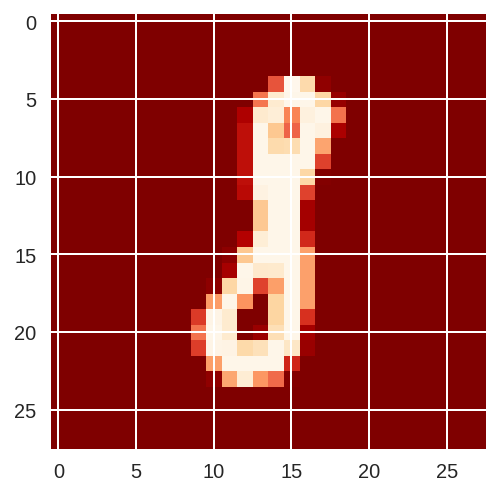

In [57]:
plt.imshow(images[1].numpy().squeeze(),cmap='OrRd_r');
#we can use color like Grey_r,Blues_r ,OrRd_r etc

In [0]:
x=torch.Tensor
def activation(x):
  return (1/(1+torch.exp(-x)))

In [11]:

feature=images.view(images.shape[0],-1)#matrix of 1*3
n_input=784
n_hidden=256 #hidden layer
n_output=10 #output layer
w1=torch.randn(n_input,n_hidden) #random weight generation from [input * hidden layer ] size matrix
w2=torch.randn(n_hidden,n_output) #random second weight generation[hidden *output layer] size matrix
b1=torch.randn((1,n_hidden)) #randoom bias generation from [single layer of column of hidden size]matrix
b2=torch.randn((1,n_output)) #random bias generation from [single layer of column of output size]matrix
print(w1,w2,b1,b2)


tensor([[ 1.2401,  0.6119, -0.7522,  ..., -0.4393, -1.1109, -0.2553],
        [-0.6357, -1.0724,  0.9085,  ...,  1.4812, -1.0297, -0.9147],
        [-0.6589,  0.4041,  0.0598,  ..., -0.7381,  0.0535, -1.6016],
        ...,
        [ 0.0819, -1.5979,  0.5813,  ...,  0.1575, -0.0856, -0.8229],
        [-0.3788,  1.8817,  1.1558,  ...,  1.5849, -0.9369,  0.4077],
        [-0.7353,  0.1451,  0.4275,  ..., -1.4813,  0.8111,  1.5010]]) tensor([[ 1.2570,  0.1806,  0.7307,  ..., -0.3524, -0.4457,  0.3169],
        [ 0.6007,  0.2097,  1.5592,  ...,  0.4364, -0.7618,  0.0876],
        [-0.7693, -0.7884,  0.1058,  ..., -0.3038,  0.9878,  0.4879],
        ...,
        [ 0.2820,  0.8210,  1.2095,  ..., -0.6403, -0.2085, -0.6635],
        [ 0.9243,  0.1330, -0.4416,  ..., -0.0902, -0.9233, -1.3538],
        [ 0.1811, -1.7741,  0.2204,  ..., -0.2976, -0.6332,  0.1463]]) tensor([[ 0.4599, -1.9391, -0.9932, -1.0655, -0.0459,  0.3262, -0.3965,  0.1708,
         -0.4424, -1.0888, -0.4923,  0.9427, -1.187

In [12]:
#solution
h=activation(torch.matmul(feature,w1)+b1) 
output=activation(torch.matmul(h,w2)+b2)
print(output)

tensor([[6.7753e-02, 5.9983e-10, 6.3462e-04, 8.7430e-01, 9.6750e-01, 2.8427e-07,
         1.3604e-02, 3.0095e-06, 1.1172e-08, 9.9906e-01],
        [1.0745e-02, 1.1994e-08, 1.9202e-06, 5.9314e-01, 2.5964e-01, 9.9420e-01,
         2.5185e-01, 2.6049e-04, 1.3508e-02, 1.0000e+00],
        [2.0742e-07, 3.3991e-09, 3.7668e-06, 8.3125e-03, 1.6150e-01, 9.9502e-01,
         8.5891e-01, 8.7209e-10, 8.8693e-03, 9.9991e-01],
        [9.8025e-01, 1.2717e-08, 2.0198e-07, 2.6300e-03, 9.8929e-01, 9.9988e-01,
         9.9947e-01, 4.8630e-07, 6.0683e-04, 9.9821e-01],
        [1.6886e-02, 3.3415e-14, 5.7519e-07, 1.0000e+00, 7.3875e-02, 4.1214e-03,
         1.0432e-04, 3.0841e-05, 2.7242e-05, 9.9981e-01],
        [1.2247e-01, 6.6080e-12, 2.5295e-03, 9.2132e-01, 9.3970e-01, 9.3739e-01,
         5.0299e-02, 5.4644e-06, 6.1693e-01, 8.7724e-01],
        [7.9011e-06, 2.9117e-12, 1.0223e-08, 9.3867e-01, 3.7493e-02, 9.5717e-01,
         9.9323e-01, 3.9304e-06, 1.4937e-09, 9.9831e-01],
        [2.4265e-04, 8.5320

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    #input to hiden layers
    self.hidden=nn.Linear(784,256)
    #input to ooutput layers
    self.output=nn.Linear(256,10)
    self.sigmoid=nn.Sigmoid()
    self.softmax=nn.Softmax(dim=1)
  def forward(self,x):
    x=self.hidden(x)
    x=self.output(x)
    x=self.sigmoid(x)
    x=self.softmax(x)
    retun(x)

In [0]:
import torch.nn.functional as F
from torch import optim

In [0]:
class Network1(nn.Module):
  def __init__(self):
    super().__init()
    #input to hidden layers
    self.hidden=nn.Linear(784,256)
    #inpput to output layers
    self.output=nn.Linear(256,10)
  def forward(self,x):
    x=F.Sigmoid(self.hidden)
    x=F.Softmax(sel.output)
    return x

In [46]:
model=nn.Sequential(nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10),nn.ReLU(),nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.003)#traning data
epochs=5
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output=model.forward(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print({running_loss/len(trainloader)})

{1.922237986821864}
{0.8603356657569596}
{0.532098594631976}
{0.43428548519164006}
{0.38618509692233255}


In [30]:
#used to import from colab
from google.colab import files
files.upload()
# choose the file on your computer to upload it then
import helper

Saving helper.py to helper.py


In [0]:
import helper


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


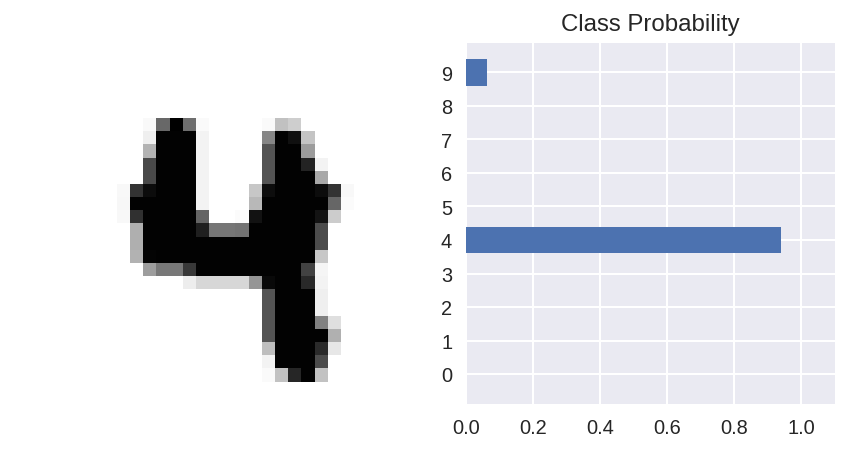

In [63]:
%matplotlib inline
images,labels=next(iter(trainloader))
img=images[0].view(1,784)
with torch.no_grad():
  logits=model.forward(img)
ps=F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),ps)